# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [57]:
import pandas as pd
import numpy as np

In [58]:
# Acceso al sistema de archivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
%cd '/content/drive/My Drive/machine_learning/db'

/content/drive/My Drive/machine_learning/db


In [60]:
%pwd

'/content/drive/My Drive/machine_learning/db'

In [61]:
%ls

diabetes.csv  insurance.csv  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df_data.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [62]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Cambiar total_charges a numeric

In [ ]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

## Manejo de datos nulos

In [ ]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df_data.dropna(inplace=True)

## Eliminar id ( porque no nos es util )

In [ ]:
df_data.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [ ]:
df_data.drop('customerID',axis=1,inplace=True)

## Convertir a numérico variable objetivo

In [ ]:
df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

In [ ]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [ ]:
df_data_processing = pd.get_dummies(df_data_processing) # Esto es one-hot encoding ya que el marchine learning no se lleva bien con los textos sino con los numeros.
df_data_processing.head(5)

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              False                False                  True   
1              False                 True                 False   
2              False                False                  True   
3              False                 True                 False   
4              False                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 46 columns]

## Analisis de correlación

In [ ]:
import matplotlib.pyplot as plt

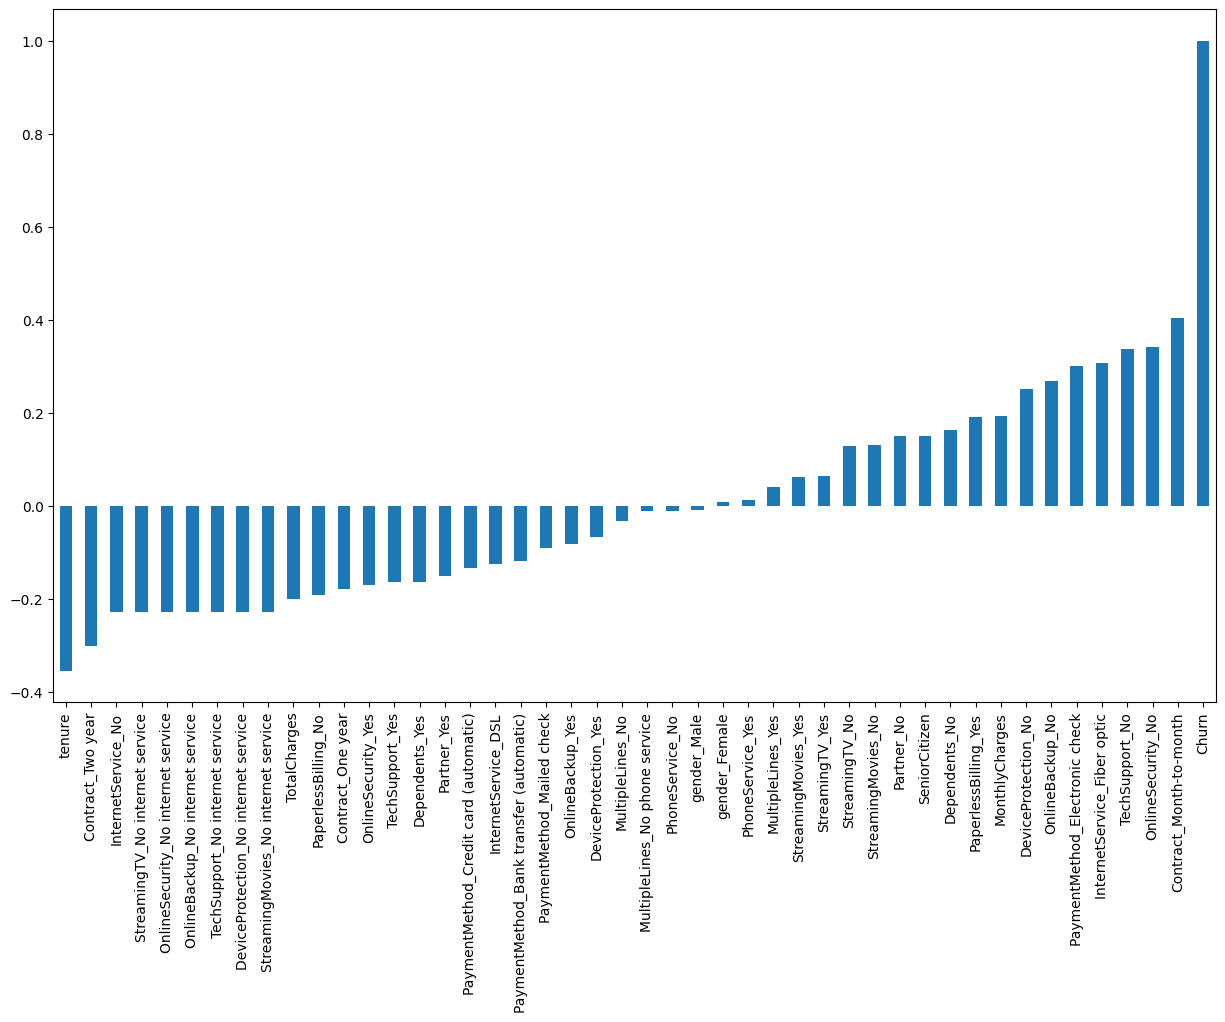

In [ ]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

las barras que tienen poco height son las barras que no estan correlacionadas con el churn osea que no importar mucho.

## Escalabilidad de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [ ]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [ ]:
df_data_processing_scaled.columns = df_data_processing.columns

In [ ]:
df_data_processing_scaled.head(5)

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0            0.0  0.000000        0.115423      0.001275    0.0   
1            0.0  0.464789        0.385075      0.215867    0.0   
2            0.0  0.014085        0.354229      0.010310    1.0   
3            0.0  0.619718        0.239303      0.210241    0.0   
4            0.0  0.014085        0.521891      0.015330    1.0   

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            1.0          0.0         0.0          1.0            1.0  ...   
1            0.0          1.0         1.0          0.0            1.0  ...   
2            0.0          1.0         1.0          0.0            1.0  ...   
3            0.0          1.0         1.0          0.0            1.0  ...   
4            1.0          0.0         1.0          0.0            1.0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                  0.0                      1.0                0.0   
1                  0.0                      0.0                1.0   
2                  0.0                      1.0                0.0   
3                  0.0                      0.0                1.0   
4                  0.0                      1.0                0.0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                0.0                  0.0                   1.0   
1                0.0                  1.0                   0.0   
2                0.0                  0.0                   1.0   
3                0.0                  1.0                   0.0   
4                0.0                  0.0                   1.0   

   PaymentMethod_Bank transfer (automatic)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0  

[5 rows x 46 columns]

## Análisis exploratorio de datos

In [ ]:
import seaborn as sns

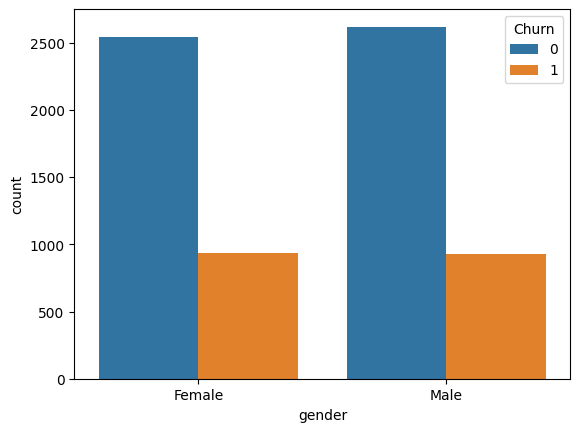

In [ ]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [ ]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

In [ ]:
column_cat = df_data.select_dtypes(include='object').columns

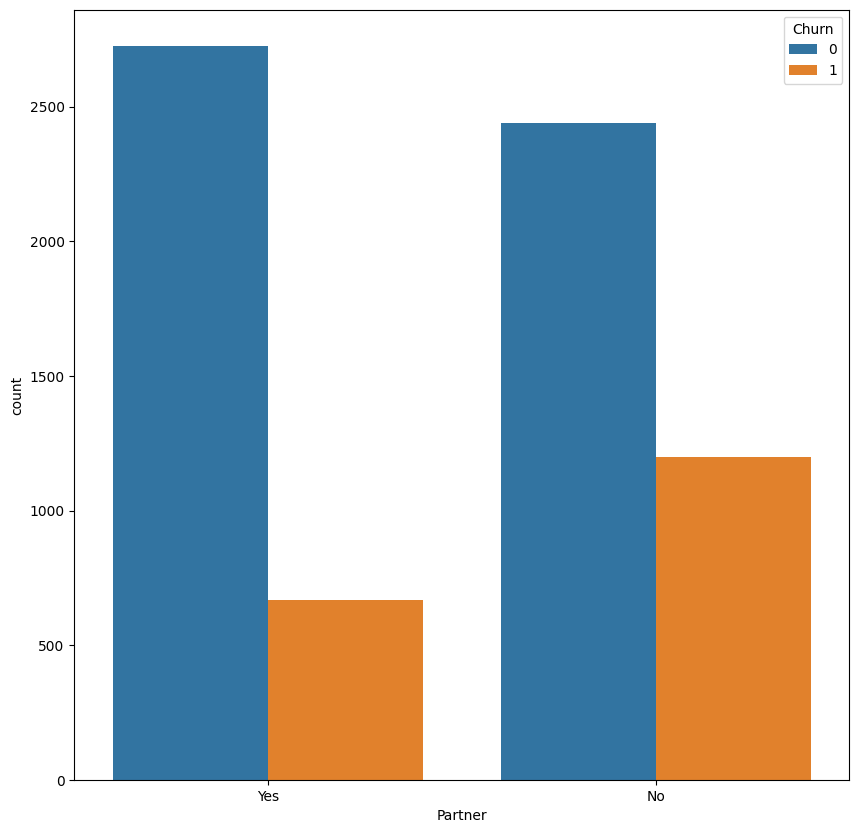

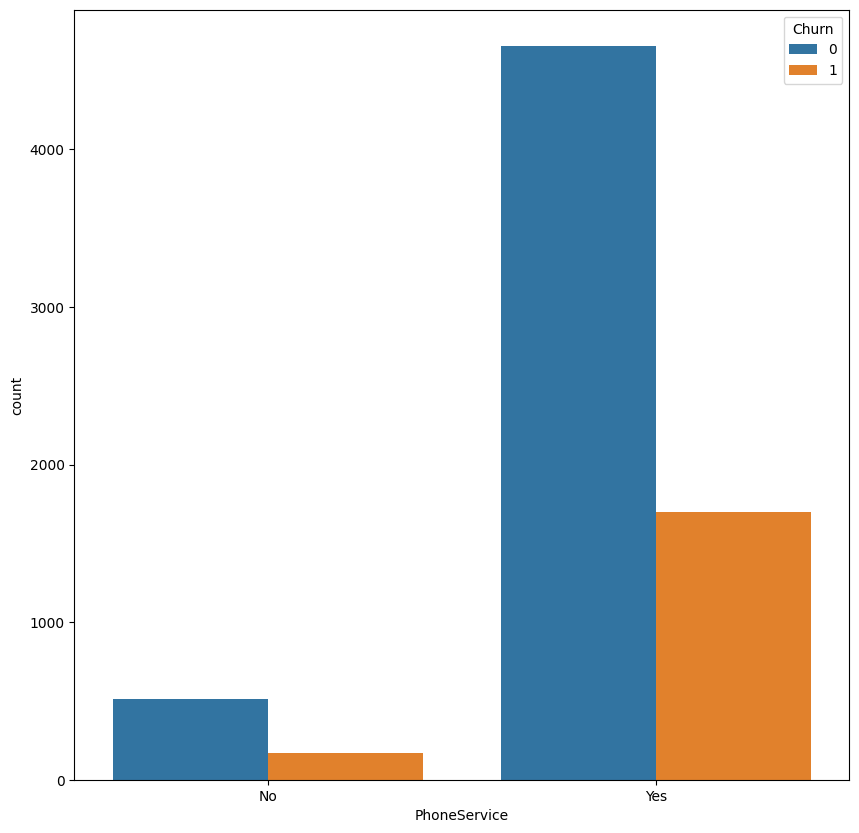

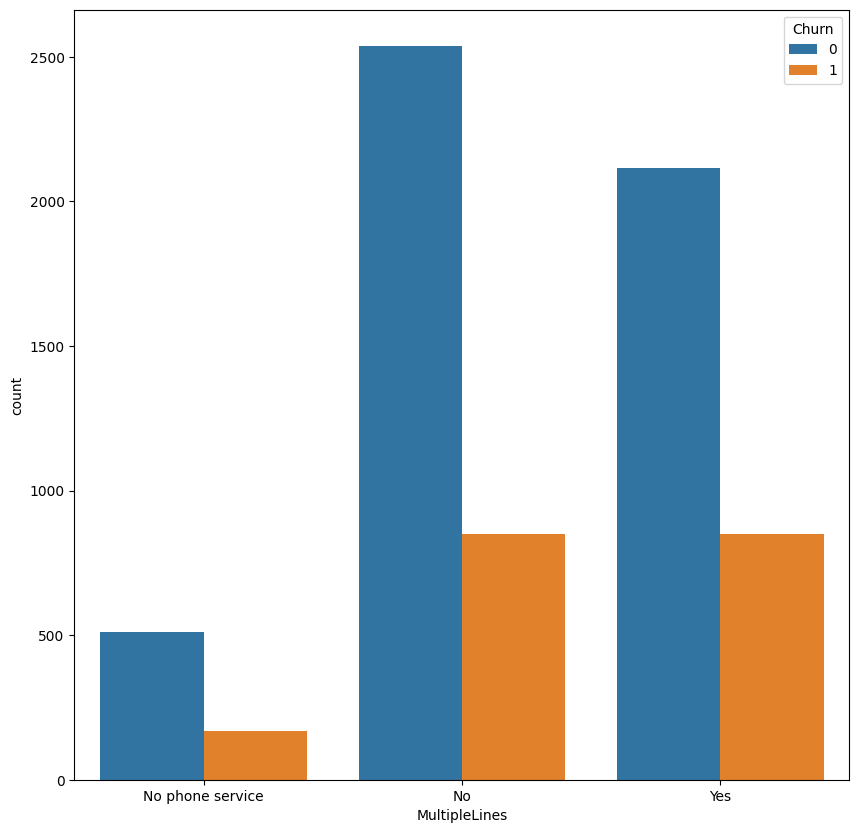

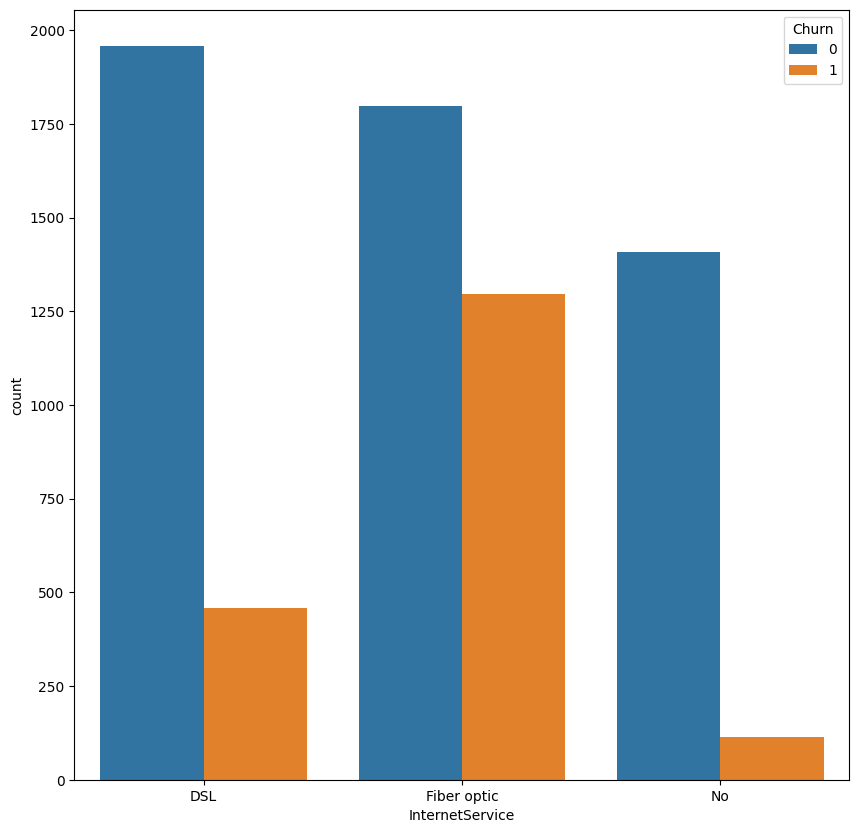

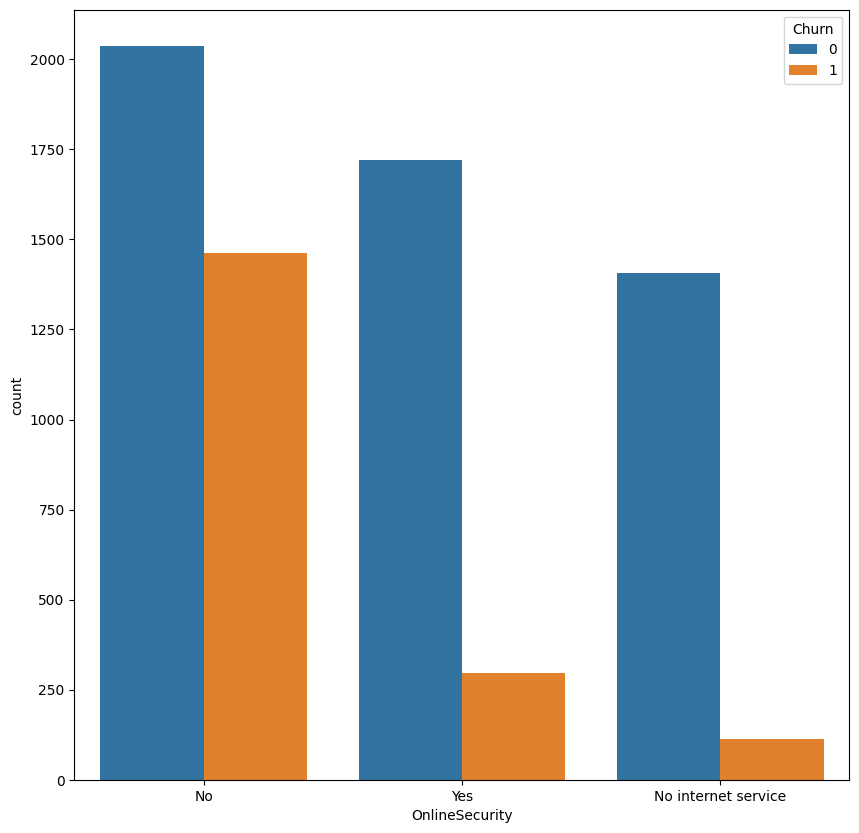

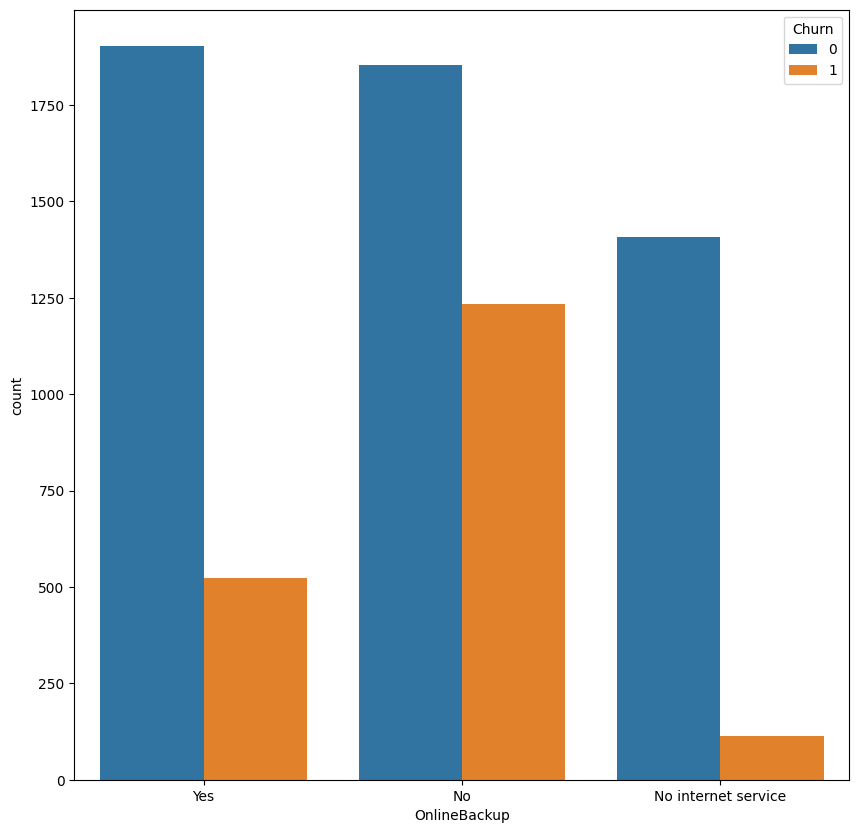

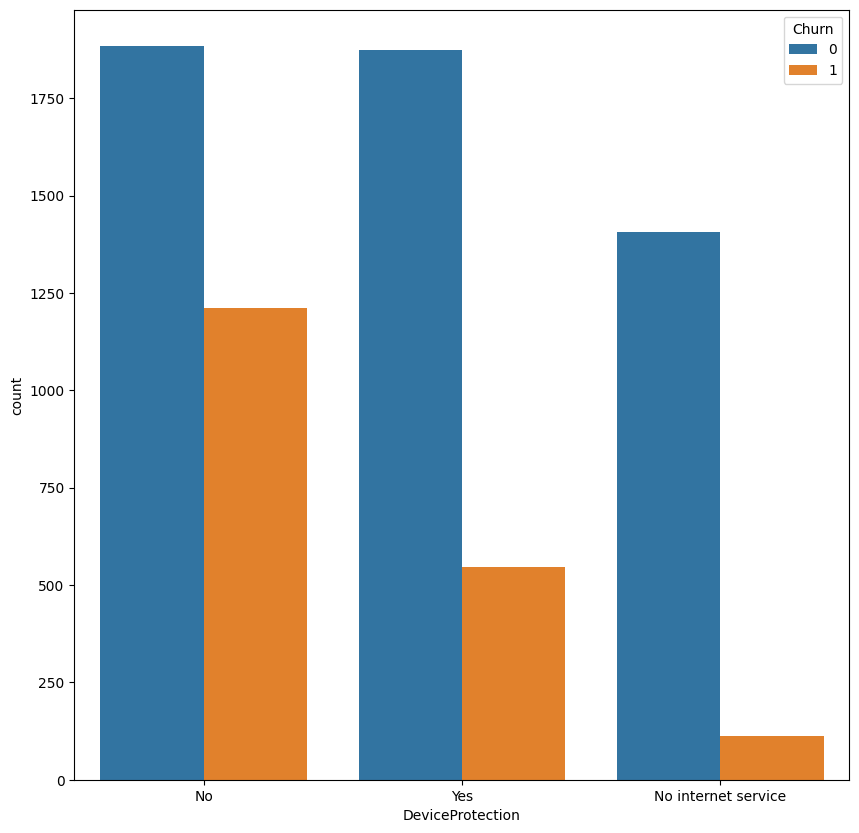

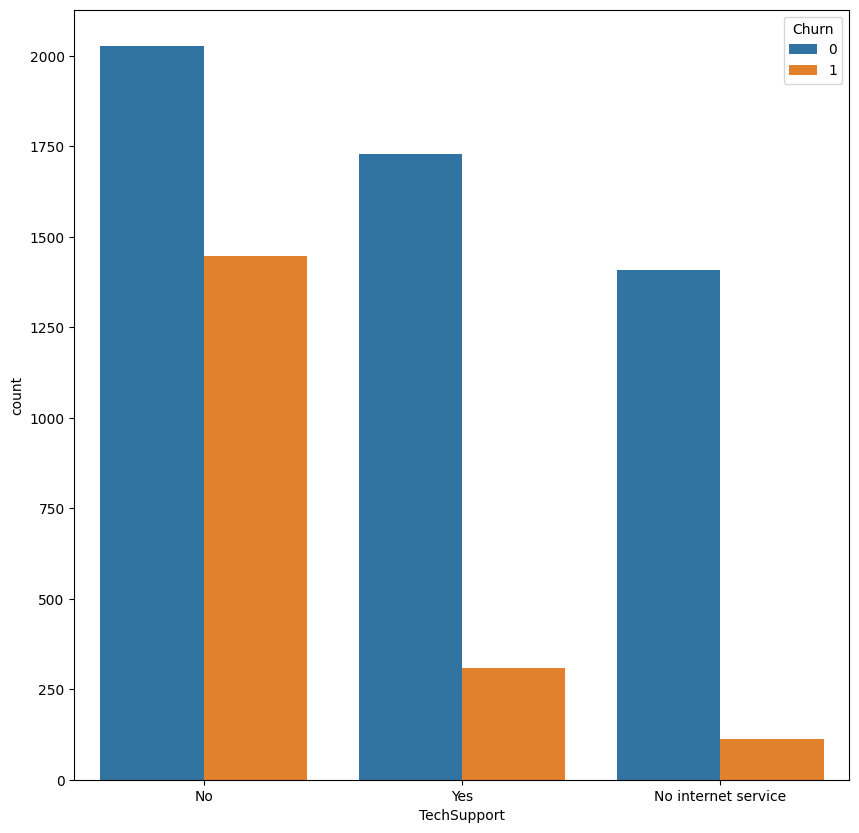

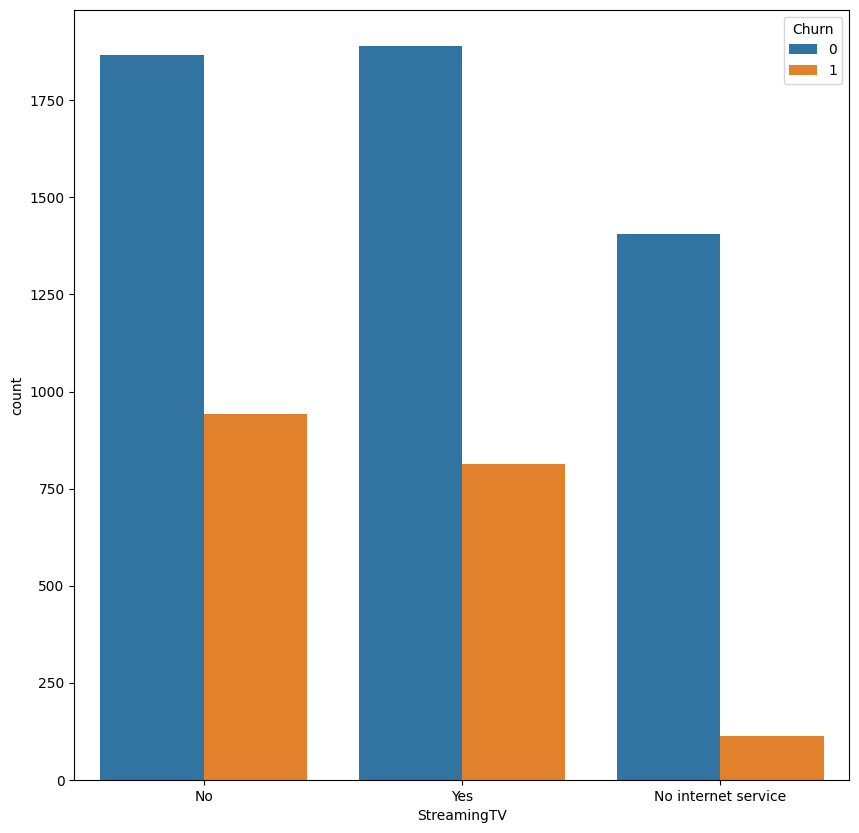

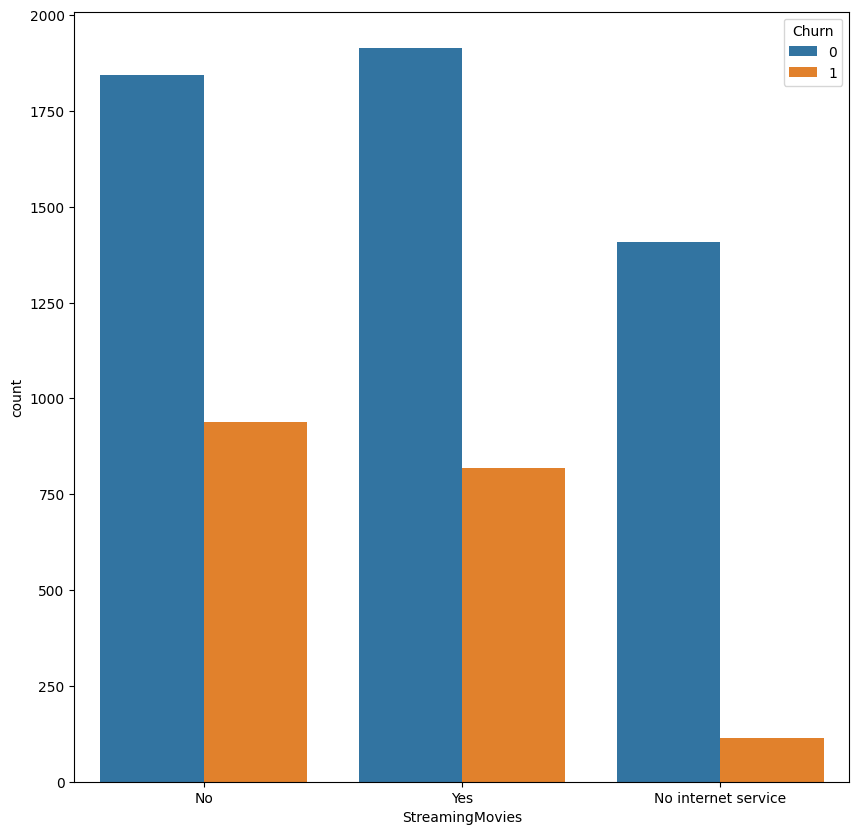

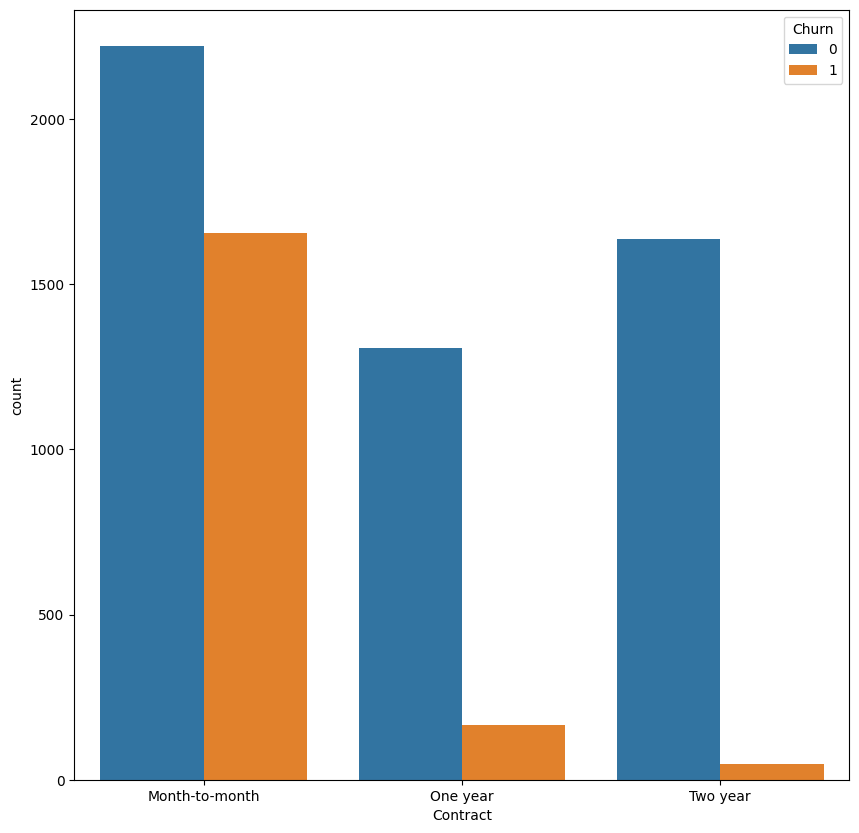

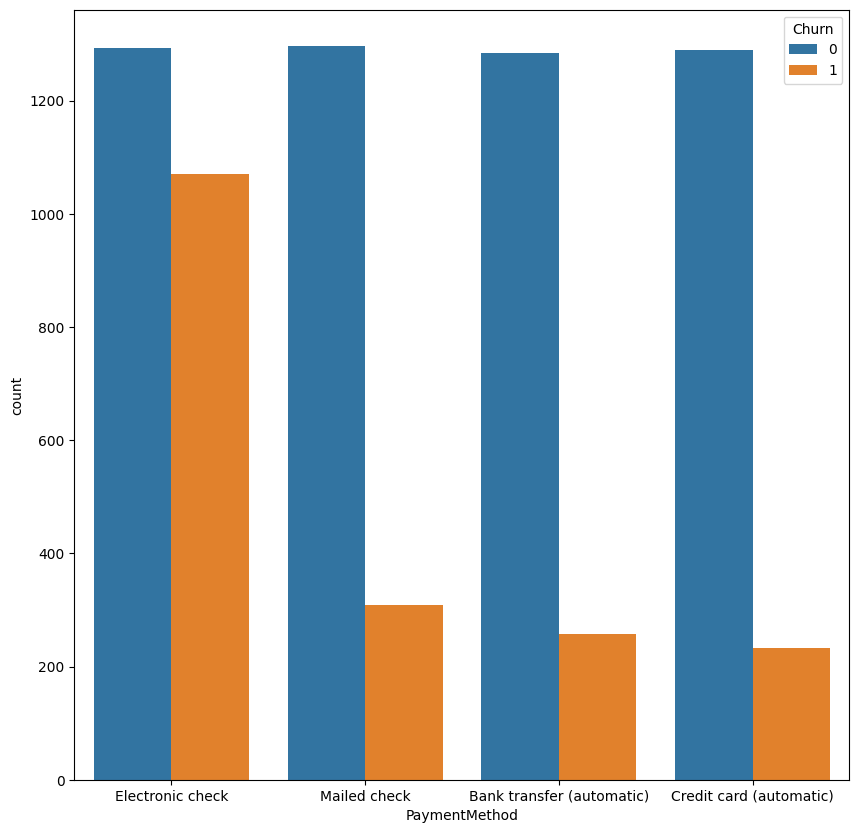

In [ ]:
for _ in column_cat:
    plot_categorial(_)

<Figure size 1000x1000 with 0 Axes>

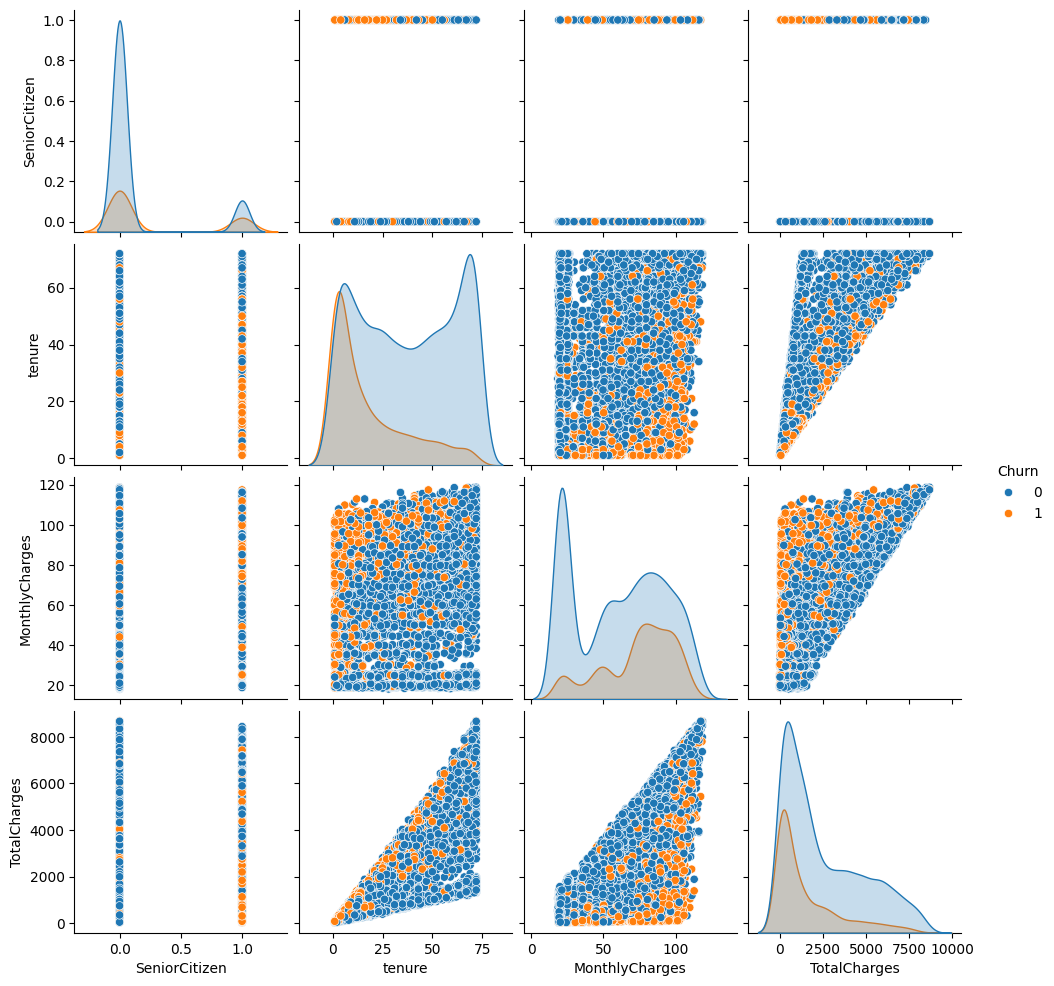

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn') # El pairplot solo toma los datos numericos es por eso que no debemes preocuparnos por hacer un filtrado de la informacion.
plt.show()

## Aporte de una function de un Estudiante de Platzi

In [ ]:
# Importando las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_categoricals(data, ncols=2, churn_column='Churn'):
    """
    Esta función identifica y crea gráficos de conteo para todas las variables categóricas en el DataFrame con respecto a una columna de interés.

    Parámetros:
    - data: DataFrame de pandas que contiene los datos a graficar.
    - ncols: número de columnas en la visualización de gráficos. El default es 2.
    - churn_column: nombre de la columna por la cual se desea hacer el hue. Default es 'Churn'.
    """

    # Extrae las columnas categóricas del DataFrame
    categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and col != churn_column]

    # Calcula el número total de gráficos a realizar y organiza el layout de subplots
    nplots = len(categorical_columns)
    nrows = (nplots // ncols) + (nplots % ncols > 0)
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5), constrained_layout=True)

    # Itera sobre el número de filas y columnas para crear los gráficos
    for i, ax in enumerate(axes.flatten()):
        if i < len(categorical_columns):  # Verifica si aún hay columnas para graficar
            title = categorical_columns[i]
            sns.countplot(data=data, x=title, hue=churn_column, ax=ax)
            ax.set_title(f'COUNT {title.upper()}')  # Título del gráfico
            ax.set_xlabel(title)  # Etiqueta del eje X
            ax.set_ylabel('Count')  # Etiqueta del eje Y
            ax.legend()  # Muestra la leyenda
        else:
            ax.set_visible(False)  # Oculta los subplots extras

    plt.show()  # Muestra los gráficos

# Ejemplo de uso de la función
# Asegúrate de reemplazar 'df' con el nombre de tu DataFrame
# plot_categoricals(df, 3, 'Churn')

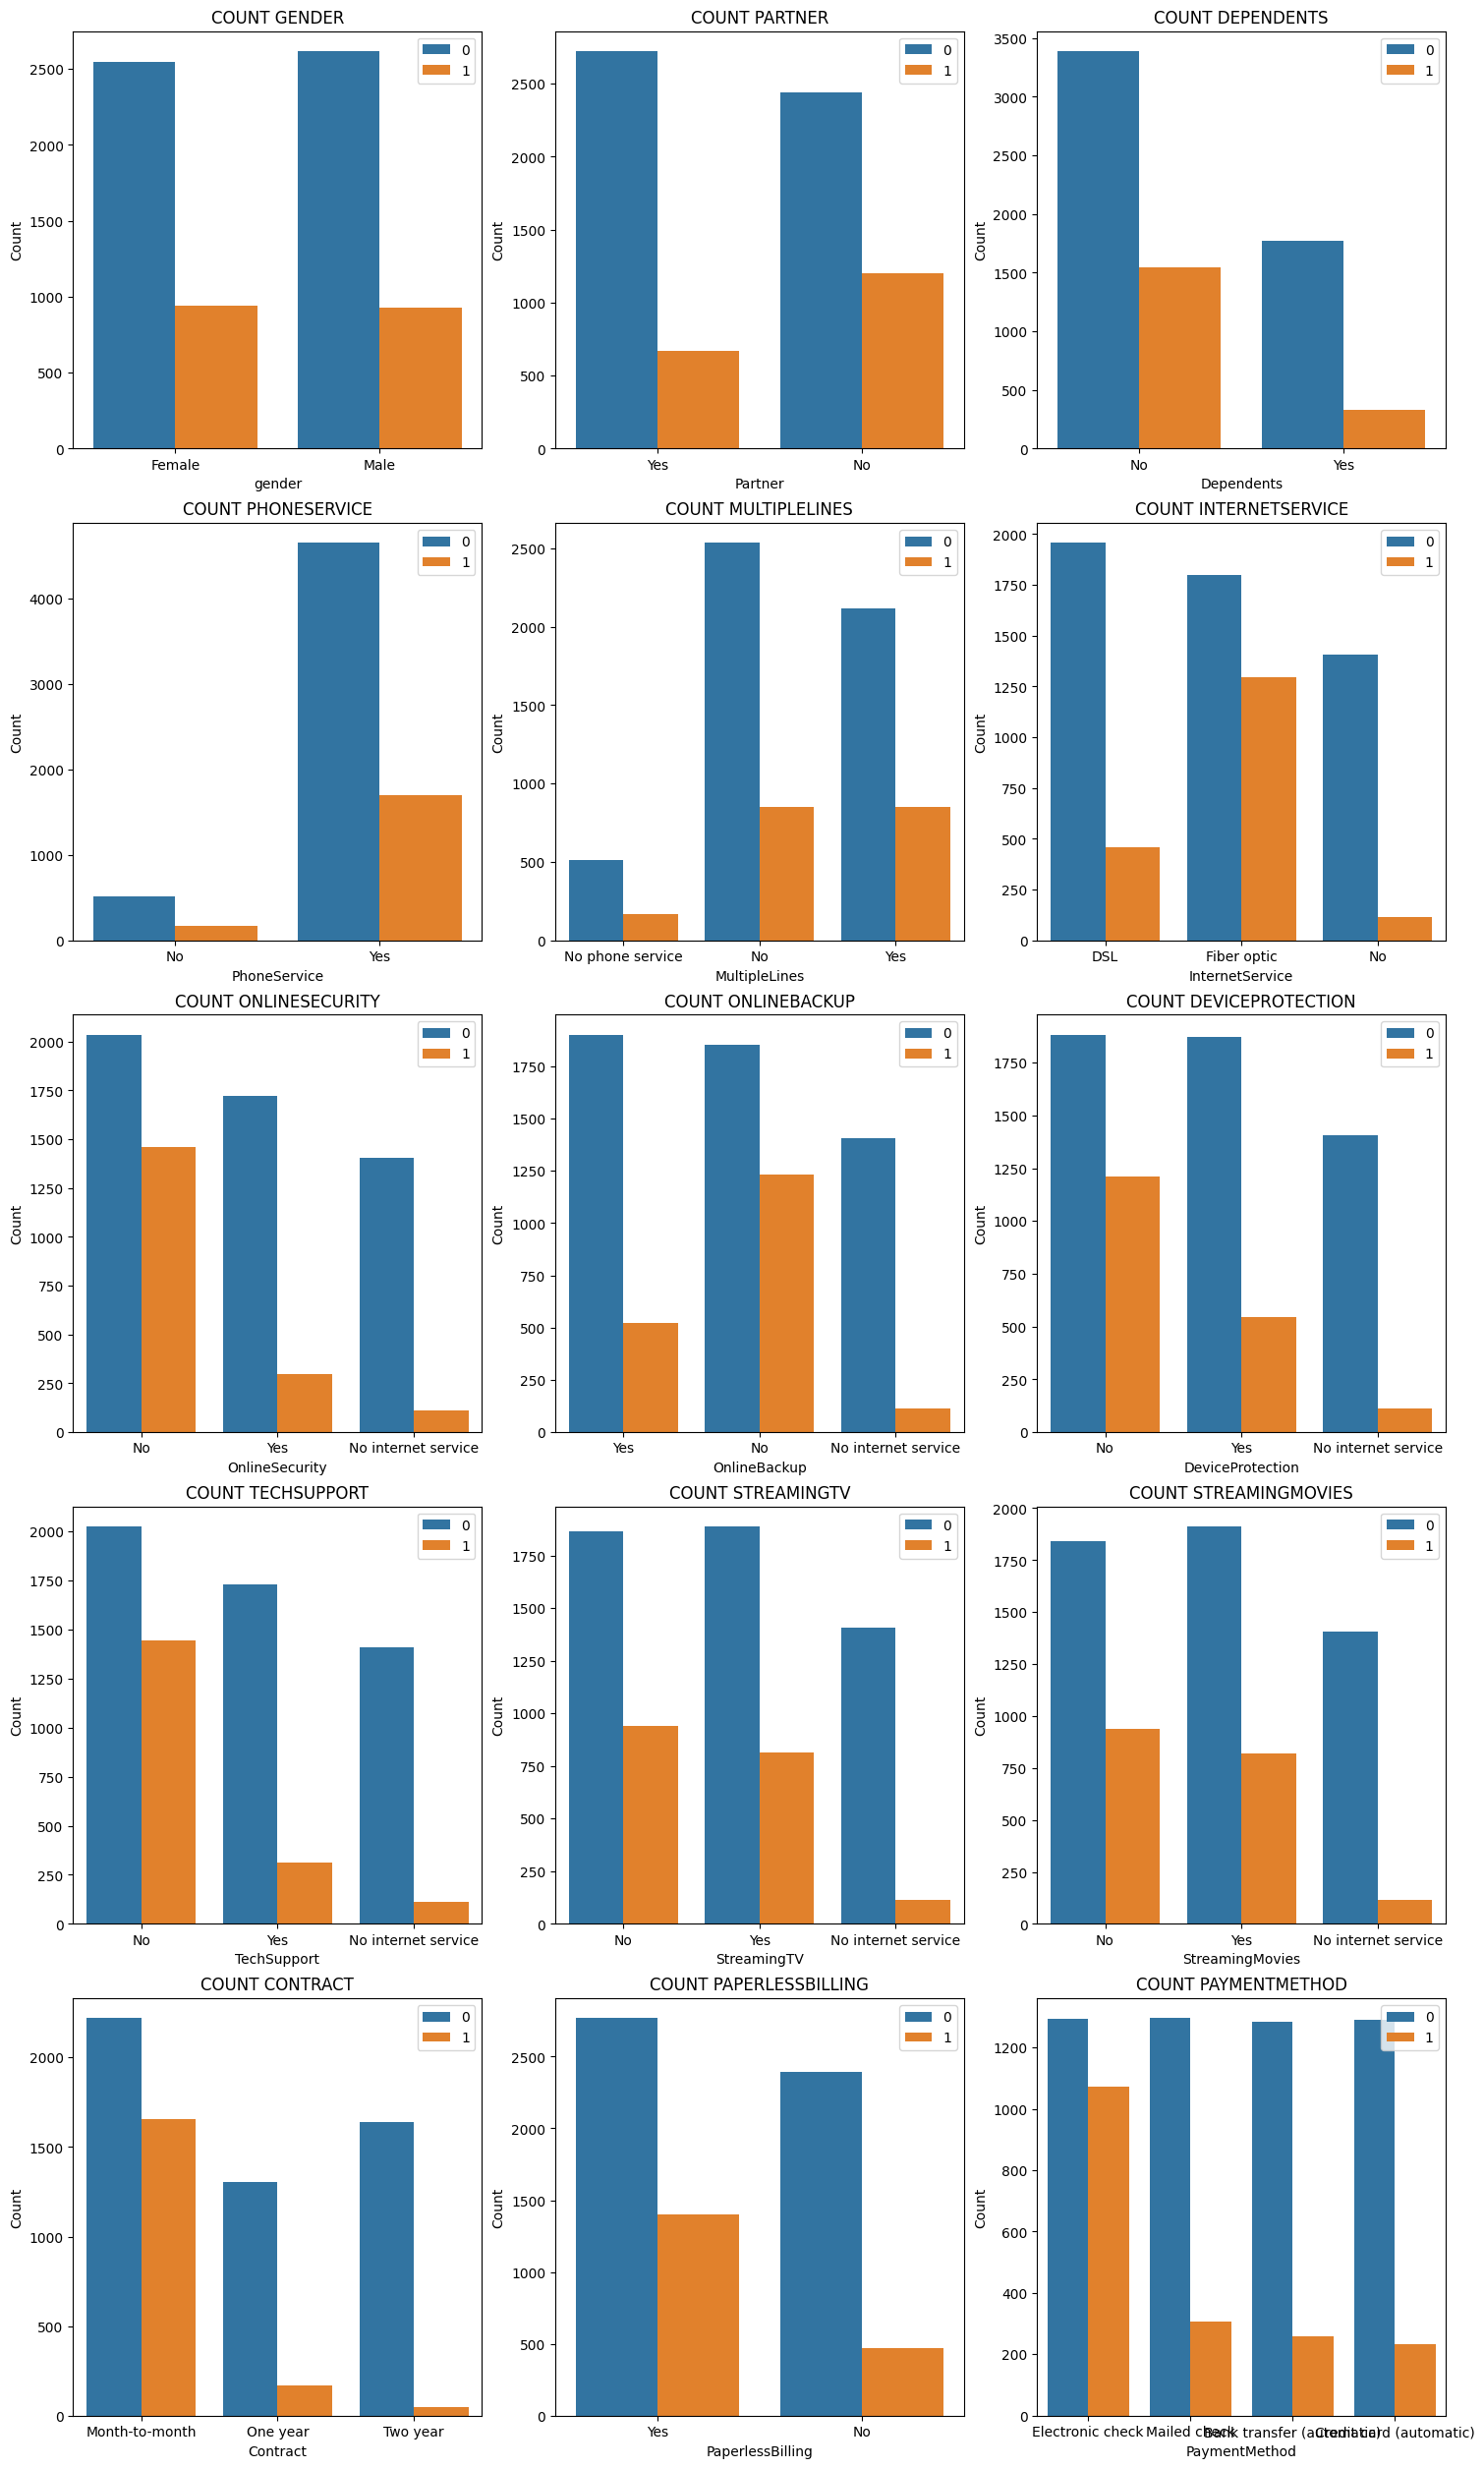

In [ ]:
plot_categoricals(df_data, 3, 'Churn')

## Entrenamiento del modelo de regresión logística binomial

In [ ]:
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


## Evaluación del modelo

In [ ]:
model.predict_proba(X_test)

array([[0.9902118 , 0.0097882 ],
       [0.86177512, 0.13822488],
       [0.30193053, 0.69806947],
       ...,
       [0.99028271, 0.00971729],
       [0.70132406, 0.29867594],
       [0.82865273, 0.17134727]])

In [ ]:
model.coef_

array([[ 2.16456329e-01, -3.10072438e+00, -1.62275558e-01,
         1.19637002e+00,  9.38227765e-04, -2.24786684e-02,
        -7.14958453e-02,  4.99554047e-02,  1.16808125e-01,
        -1.38348565e-01,  8.51141942e-02, -1.06654635e-01,
        -1.58854568e-01,  8.51141942e-02,  5.21999335e-02,
        -4.17809899e-01,  5.11407650e-01, -1.15138192e-01,
         2.40091205e-01, -1.15138192e-01, -1.46493454e-01,
         8.40771354e-02, -1.15138192e-01,  9.52061616e-03,
         5.65202109e-02, -1.15138192e-01,  3.70775407e-02,
         2.20216931e-01, -1.15138192e-01, -1.26619180e-01,
        -8.59200111e-02, -1.15138192e-01,  1.79517763e-01,
        -8.76623695e-02, -1.15138192e-01,  1.81260121e-01,
         7.42705642e-01, -9.75380680e-02, -6.66708014e-01,
        -1.13990474e-01,  9.24500336e-02, -2.72553507e-03,
        -1.58698780e-01,  2.16924691e-01, -7.70408172e-02]])

In [ ]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


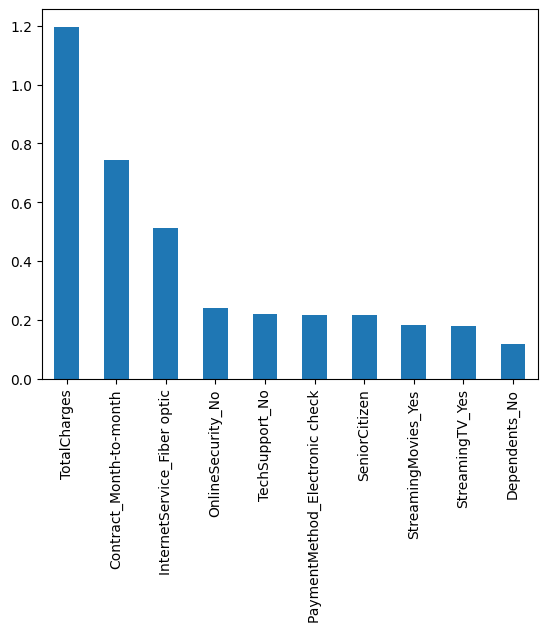

In [ ]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar')) # Ver cuando las personas deciden hacer churn.

Axes(0.125,0.11;0.775x0.77)


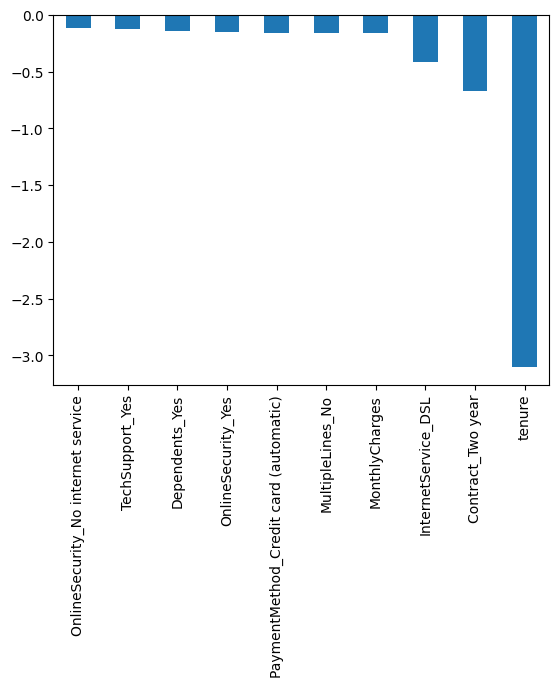

In [ ]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar')) # Aqui podemos ver cuando no hacen churn.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

<Figure size 1100x1100 with 0 Axes>

Cuando el valor verdadero era cera el valor predicho en verdad le atino las 1381 veces y cuando el valor real era 1 lo predijo 298 veces bien, esto se debe a que tenemos mas personas que no hicieron churn con las que si lo hicieron.

La otra diagognal nos dicen los errores que cuando en verdad era cero lo predijo como 1 y eso lo hizo 263 veces